## Importerer pakker

In [2]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split


## Leser inn renset fil

In [3]:
df_train = pd.read_csv('train_df.csv')
pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

## Beskrivelse av data

In [4]:
df_train.describe()

oppholdslengde        alder    utdanning   sykehusdød    blodtrykk  \
count     5413.000000  5411.000000  4458.000000  5413.000000  5382.000000   
mean        17.646037    62.882462    11.692463     0.263994    84.527220   
std         21.417539    15.563223     3.425327     0.440837    27.029433   
min          3.000000    18.000000     0.000000     0.000000     5.000000   
25%          6.000000    53.000000    10.000000     0.000000    63.000000   
50%         11.000000    65.000000    12.000000     0.000000    77.000000   
75%         20.000000    74.000000    14.000000     1.000000   107.000000   
max        343.000000   102.000000    30.000000     1.000000   195.000000   

       hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count        5413.000000     5360.000000           5372.000000   
mean           12.219961       98.124571             23.522710   
std             9.019123       30.317112              9.365579   
min             0.000000        1.000000              3.000000   
25%             7.000000       72.000000             18.000000   
50%            10.500000      100.000000             24.000000   
75%            15.099609      120.000000             28.000000   
max           128.781250      232.000000             70.000000   

       kroppstemperatur  lungefunksjon  serumalbumin    kreatinin  \
count       5413.000000    5413.000000   5413.000000  5413.000000   
mean          37.119087     263.476420      3.153280     1.786458   
std            1.259334     103.343026      0.782000     1.691612   
min           31.699220      12.000000      0.399963     0.099991   
25%           36.195310     178.312500      2.699707     0.899902   
50%           36.695310     276.625000      3.500000     1.199951   
75%           38.195310     333.300000      3.500000     1.899902   
max           41.695310     869.375000     29.000000    18.398438   

           natrium      blod_ph      glukose  blodurea_nitrogen   urinmengde  \
count  5413.000000  4048.000000  2730.000000        5413.000000  5413.000000   
mean    137.528173     7.414502   160.983883          20.082658  2374.575083   
std       6.040926     0.081907    91.650084          23.338738   966.662877   
min     110.000000     6.829102     1.399902           1.000000     1.000000   
25%     134.000000     7.379883   103.000000           6.510000  2110.000000   
50%     137.000000     7.419922   134.000000           6.510000  2502.000000   
75%     141.000000     7.469727   191.000000          25.000000  2502.000000   
max     181.000000     7.769531  1092.000000         192.000000  9000.000000   

       antall_komorbiditeter   koma_score  adl_stedfortreder  \
count            5413.000000  5413.000000        3711.000000   
mean                1.860521    12.529281           1.636756   
std                 1.329889    25.197060           2.238860   
min                 0.000000     0.000000           0.000000   
25%                 1.000000     0.000000           0.000000   
50%                 2.000000     0.000000           1.000000   
75%                 3.000000     9.000000           3.000000   
max                 7.000000   100.000000           7.000000   

       fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
count        5413.000000                5413.00000               5413.000000   
mean           25.608652                  37.87179                  0.631458   
std            10.040329                  20.05021                  0.250473   
min             0.199982                   0.00000                  0.000000   
25%            19.000000                  23.00000                  0.498962   
50%            24.097656                  35.00000                  0.710938   
75%            30.296875                  49.00000                  0.824951   
max            99.187500                 133.00000                  0.969971   

       overlevelsesestimat_6mnd     diabetes       demens  \
count           

## Korrelasjonsmatrise for numeriske variabler

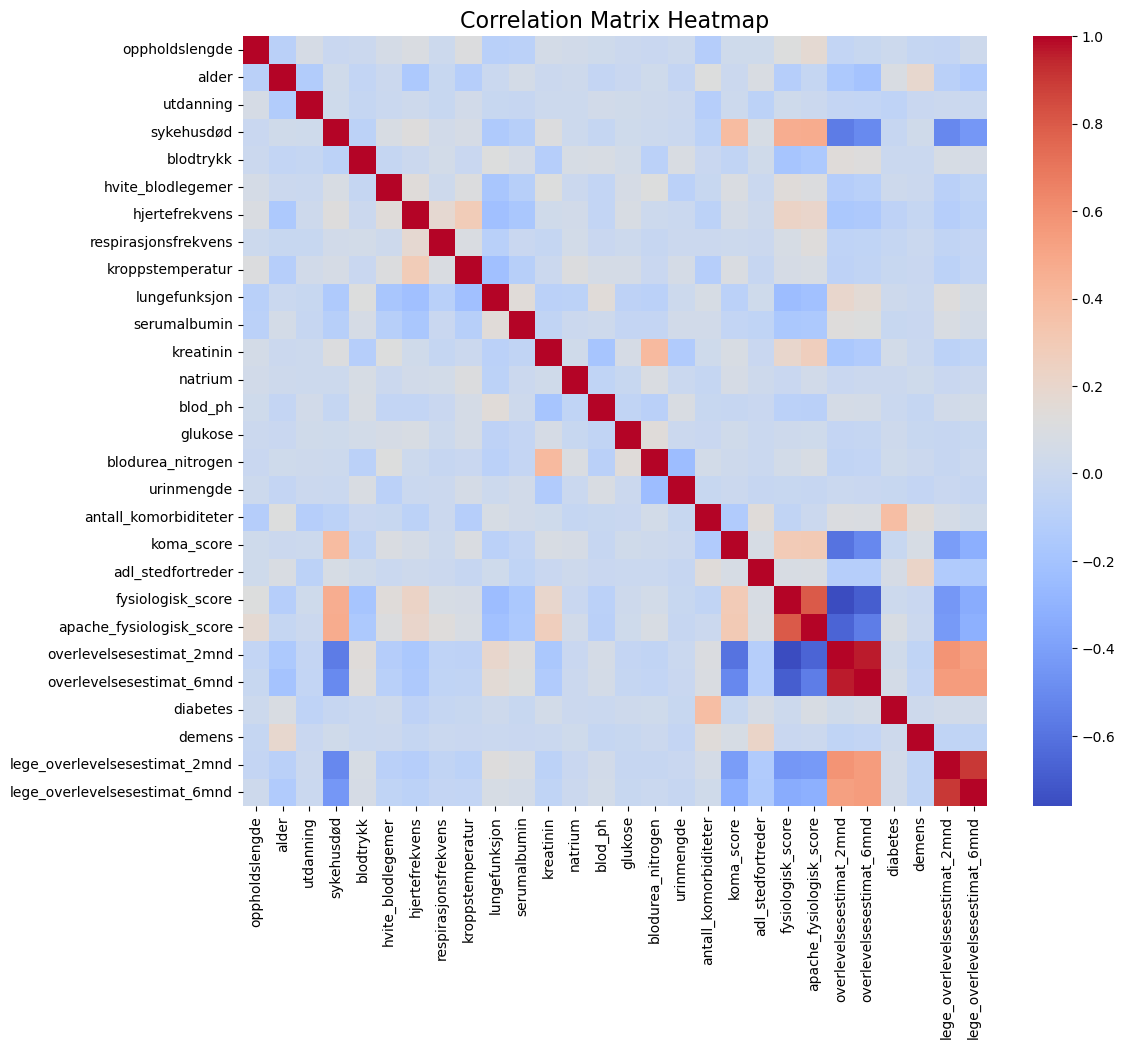

In [5]:
# Velg kun de numeriske kolonnene fra datasettet
numeric_df = df_train.select_dtypes(include=[np.number])

# Beregn korrelasjonsmatrisen ved kun å bruke de numeriske kolonnene
corr_matrix = numeric_df.corr()

# Visualiser korrelasjonsmatrisen som en heatmap
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_matrix, cmap="coolwarm")  
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Korrelasjonsmatrise avhengig av oppholdslengde

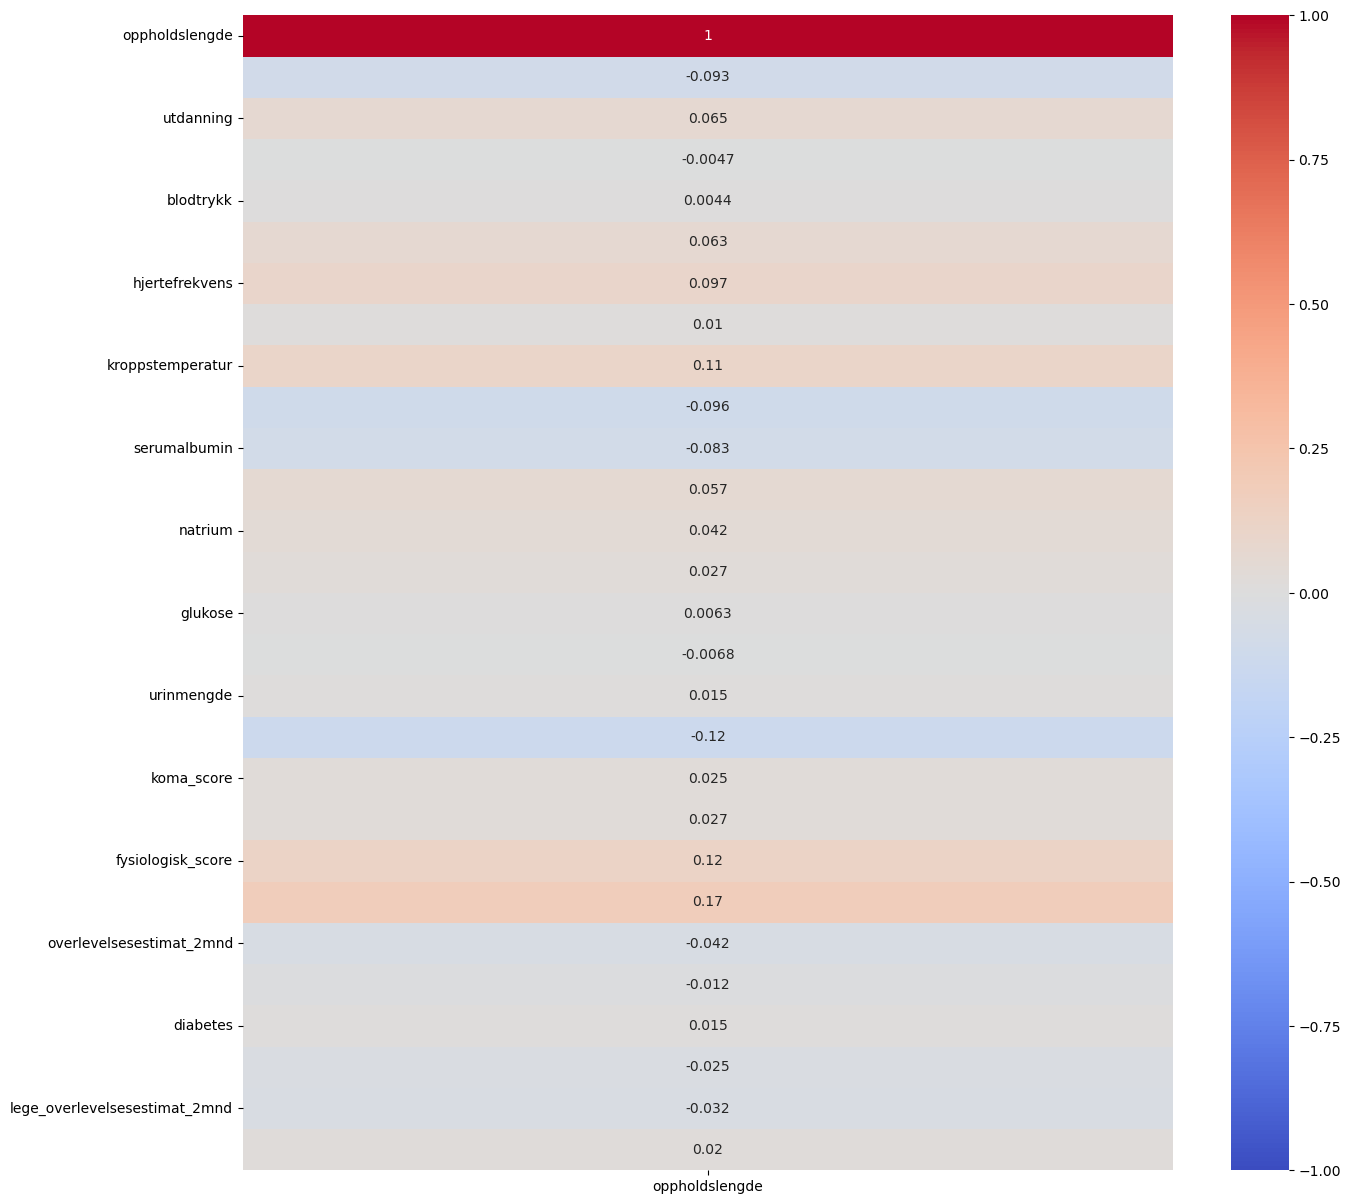

In [6]:
# Velg kun de numeriske kolonnene fra datasettet
numeric_df = df_train.select_dtypes(include=[np.number])

# Beregn korrelasjonsmatrisen ved å bruke kun de numeriske kolonnene
corr_matrix = numeric_df.corr()

# Filtrer ut korrelasjoner som er knyttet til 'oppholdslengde'
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Visualiser korrelasjoner med 'oppholdslengde' som et heatmap
sns.heatmap(oppholdslengde_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.gcf().set_size_inches(15, 15)

## Korrelasjonsmatrise avhengig av oppholdslengde delt opp med en terskel på 0.05

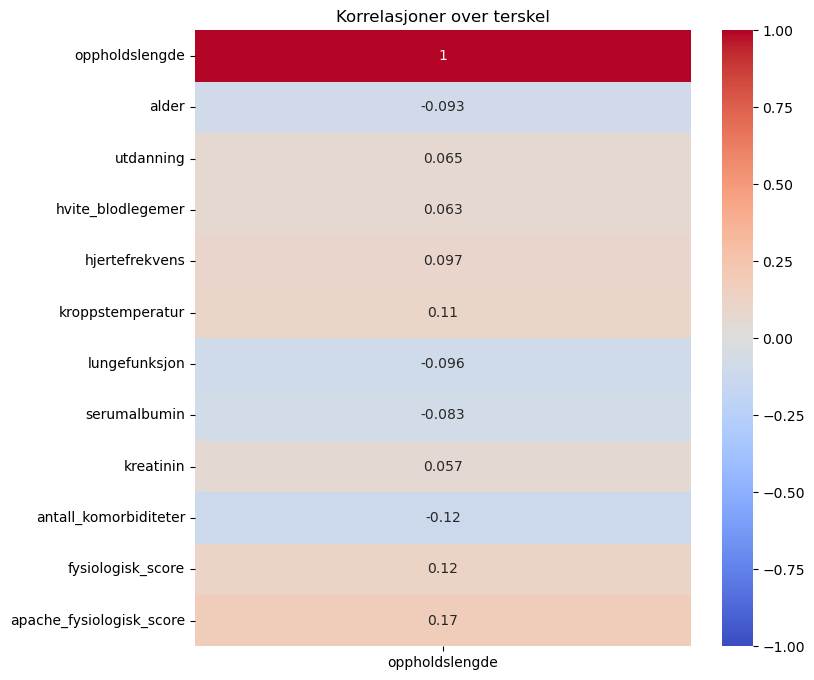

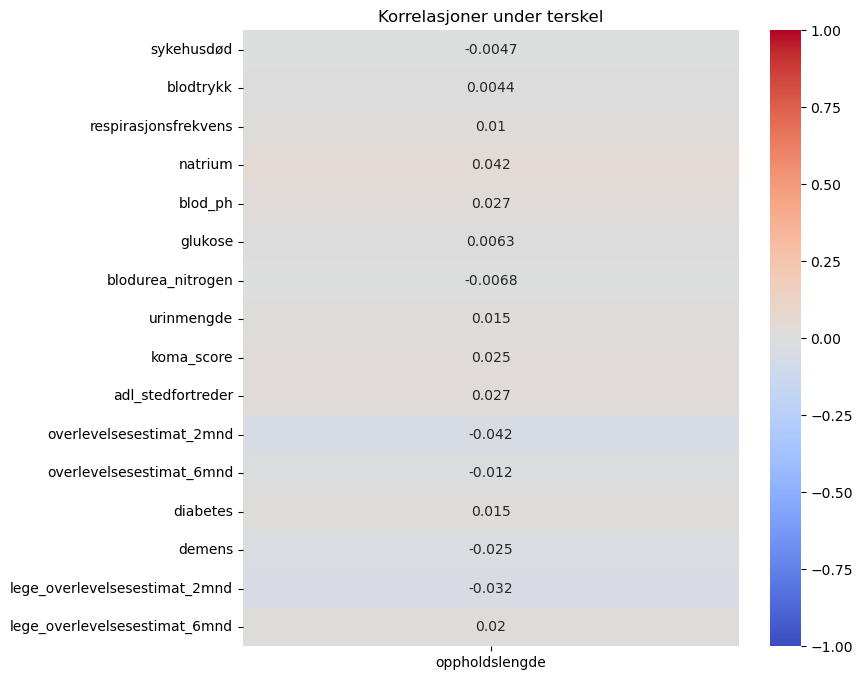

In [7]:
# Velg kun de numeriske kolonnene fra datasettet
numeric_df = df_train.select_dtypes(include=[np.number])

# Beregn korrelasjonsmatrisen ved å bruke kun de numeriske kolonnene
corr_matrix = numeric_df.corr()

# Filtrer ut korrelasjoner som er knyttet til 'oppholdslengde'
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Definer terskelverdi for hvilke korrelasjoner som anses som betydelige
threshold = 0.05

# Del korrelasjonsmatrisen i to basert på terskelverdien
high_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() >= threshold)]
low_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() < threshold)]

# Plot heatmap for korrelasjoner som er over terskelverdien
plt.figure(figsize=(8, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner over terskel")
plt.show()

# Plot heatmap for korrelasjoner som er under terskelverdien
plt.figure(figsize=(8, 8))
sns.heatmap(low_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner under terskel")
plt.show()

# Visualisering

## Visualisering av sykehusdata

In [59]:
fig = px.histogram(df_train, x='oppholdslengde', title='Oppholdslengde')
fig.show()

Vi ser på oppholdslengde, at normal oppholdslengde befinner seg mellom 0-50. Likevel har vi en del outliers i intervallet 50-343

In [9]:
long_stay_patients = df_train[df_train['oppholdslengde'] > 100]
long_stay_patients.describe(include='all')

oppholdslengde      alder   kjønn  utdanning     inntekt etnisitet  \
count        75.000000  75.000000      75  64.000000          44        75   
unique             NaN        NaN       2        NaN           4         5   
top                NaN        NaN  female        NaN  under $11k     white   
freq               NaN        NaN      39        NaN          16        61   
mean        137.386667  56.506667     NaN  12.953125         NaN       NaN   
std          44.252010  15.576640     NaN   3.139253         NaN       NaN   
min         101.000000  21.000000     NaN   4.000000         NaN       NaN   
25%         109.000000  47.500000     NaN  12.000000         NaN       NaN   
50%         121.000000  58.000000     NaN  12.000000         NaN       NaN   
75%         153.000000  67.000000     NaN  15.250000         NaN       NaN   
max         343.000000  86.000000     NaN  21.000000         NaN       NaN   

        sykehusdød   blodtrykk  hvite_blodlegemer  hjertefrekvens  \
count    75.000000   74.000000          75.000000       74.000000   
unique         NaN         NaN                NaN             NaN   
top            NaN         NaN                NaN             NaN   
freq           NaN         NaN                NaN             NaN   
mean      0.280000   87.229730          13.096497      108.702703   
std       0.452022   30.676191           6.163704       30.766789   
min       0.000000   35.000000           4.500000       54.000000   
25%       0.000000   64.250000           7.999512       78.500000   
50%       0.000000   79.000000          11.599609      113.000000   
75%       1.000000  112.000000          17.949219      127.750000   
max       1.000000  155.000000          33.093750      189.000000   

        respirasjonsfrekvens  kroppstemperatur  lungefunksjon  serumalbumin  \
count              75.000000         75.000000      75.000000     75.000000   
unique                   NaN               NaN            NaN           NaN   
top                      NaN               NaN            NaN           NaN   
freq                     NaN               NaN            NaN           NaN   
mean               24.173333         37.534063     230.233437      2.997217   
std                 9.592189          1.229749      97.119593      0.765108   
min                 6.000000         35.093750      52.000000      0.500000   
25%                18.500000         36.500000     145.515625      2.399902   
50%                24.000000         37.593750     230.000000      3.399902   
75%                30.500000         38.500000     310.000000      3.500000   
max                48.000000         40.195310     518.250000      4.199219   

        kreatinin     natrium    blod_ph     glukose  blodurea_nitrogen  \
count   75.000000   75.000000  65.000000   35.000000          75.000000   
unique        NaN         NaN        NaN         NaN                NaN   
top           NaN         NaN        NaN         NaN                NaN   
freq          NaN         NaN        NaN         NaN                NaN   
mean     2.442467  139.106667   7.410757  152.457143          18.325067   
std      2.563222    6.860725   0.090689   84.634975          19.559970   
min      0.399963  123.000000   7.129883   68.000000           6.510000   
25%      0.949951  134.000000   7.369141   99.000000           6.510000   
50%      1.399902  138.000000   7.419922  117.000000           6.510000   
75%      2.749756  145.000000   7.469727  182.500000          21.500000   
max     12.898438  153.000000   7.659180  395.000000          99.000000   

         urinmengde sykdomskategori sykdom_underkategori  \
count     75.000000              75                   75   
unique          NaN               3                    6   
top             NaN        ARF/MOSF    ARF/MOSF w/Sepsis   
freq            NaN              67                   65   
mean    2470.000000             NaN                  NaN   
std     1257.351743             

In [10]:
normal_stay_pasient = df_train[df_train['oppholdslengde']<=100]
df_train.describe(include='all')

oppholdslengde        alder kjønn    utdanning     inntekt etnisitet  \
count      5413.000000  5411.000000  5413  4458.000000        3675      5387   
unique             NaN          NaN     2          NaN           4         5   
top                NaN          NaN  male          NaN  under $11k     white   
freq               NaN          NaN  3041          NaN        1702      4304   
mean         17.646037    62.882462   NaN    11.692463         NaN       NaN   
std          21.417539    15.563223   NaN     3.425327         NaN       NaN   
min           3.000000    18.000000   NaN     0.000000         NaN       NaN   
25%           6.000000    53.000000   NaN    10.000000         NaN       NaN   
50%          11.000000    65.000000   NaN    12.000000         NaN       NaN   
75%          20.000000    74.000000   NaN    14.000000         NaN       NaN   
max         343.000000   102.000000   NaN    30.000000         NaN       NaN   

         sykehusdød    blodtrykk  hvite_blodlegemer  hjertefrekvens  \
count   5413.000000  5382.000000        5413.000000     5360.000000   
unique          NaN          NaN                NaN             NaN   
top             NaN          NaN                NaN             NaN   
freq            NaN          NaN                NaN             NaN   
mean       0.263994    84.527220          12.219961       98.124571   
std        0.440837    27.029433           9.019123       30.317112   
min        0.000000     5.000000           0.000000        1.000000   
25%        0.000000    63.000000           7.000000       72.000000   
50%        0.000000    77.000000          10.500000      100.000000   
75%        1.000000   107.000000          15.099609      120.000000   
max        1.000000   195.000000         128.781250      232.000000   

        respirasjonsfrekvens  kroppstemperatur  lungefunksjon  serumalbumin  \
count            5372.000000       5413.000000    5413.000000   5413.000000   
unique                   NaN               NaN            NaN           NaN   
top                      NaN               NaN            NaN           NaN   
freq                     NaN               NaN            NaN           NaN   
mean               23.522710         37.119087     263.476420      3.153280   
std                 9.365579          1.259334     103.343026      0.782000   
min                 3.000000         31.699220      12.000000      0.399963   
25%                18.000000         36.195310     178.312500      2.699707   
50%                24.000000         36.695310     276.625000      3.500000   
75%                28.000000         38.195310     333.300000      3.500000   
max                70.000000         41.695310     869.375000     29.000000   

          kreatinin      natrium      blod_ph      glukose  blodurea_nitrogen  \
count   5413.000000  5413.000000  4048.000000  2730.000000        5413.000000   
unique          NaN          NaN          NaN          NaN                NaN   
top             NaN          NaN          NaN          NaN                NaN   
freq            NaN          NaN          NaN          NaN                NaN   
mean       1.786458   137.528173     7.414502   160.983883          20.082658   
std        1.691612     6.040926     0.081907    91.650084          23.338738   
min        0.099991   110.000000     6.829102     1.399902           1.000000   
25%        0.899902   134.000000     7.379883   103.000000           6.510000   
50%        1.199951   137.000000     7.419922   134.000000           6.510000   
75%        1.899902   141.000000     7.469727   191.000000          25.000000   
max       18.398438   181.000000     7.769531  1092.000000         192.000000   

         urinmengde sykdomskategori sykdom_underkategori  \
count   5413.000000            5413                 5413   
unique          NaN               4                    8   
top             NaN        ARF/MOSF    ARF/MOSF w/Sepsis   
freq            NaN            2

313 av 5413 pasienter har en oppholdslengde større enn 50 dager. Det som kjennetegner disse pasientene, er at de i gjennomsnitt har noe høyere fysiologiske verdier enn normalen. Likevel er denne endringen minimal, og det er ikke noe veldig tydelig kjennetegn for pasienter som har lengre oppholdslengde.

## Visualisering av fysiologiske data

In [53]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Liste over fysiologiske data som skal plottes mot lengden på sykehusoppholdet
fysiologiske_data = ['blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin', 
                     'kreatinin', 'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde']

# Sørg for at 'long_stay' er en boolsk kolonne (True/False) basert på om oppholdslengden er over 100 dager
df_train['long_stay'] = df_train['oppholdslengde'] > 100

# Opprett subplot med 7 rader og 2 kolonner
fig = make_subplots(rows=7, cols=2, subplot_titles=fysiologiske_data, horizontal_spacing=0.05, vertical_spacing=0.05)

# Loop gjennom hver fysiologisk variabel og legg til som et scatter plot i hver celle i subplotten
for i, value in enumerate(fysiologiske_data):
    row = (i // 2) + 1  # Beregn radnummer (1-7)
    col = (i % 2) + 1   # Beregn kolonnenummer (1-2)
    
    scatter = go.Scatter(
        x=df_train[value],
        y=df_train['oppholdslengde'],
        mode='markers',
        marker=dict(
            color=df_train['long_stay'].astype(int),  # Konverter True/False til 1/0 for fargebruk
            colorscale=['blue', 'red'],  # Blå for kort opphold, Rød for langt opphold
            colorbar=dict(title="Long Stay"),
            showscale=(i == 0)  # Vis fargeskala kun på første plot for å spare plass
        ),
        name=value
    )
    fig.add_trace(scatter, row=row, col=col)

# Oppdater layout for redusert høyde og strammere marger
fig.update_layout(
    title_text="Scatter Plots of Physiological Data vs. Hospital Stay Length",
    height=1400,  # Juster høyden for bedre plass i et 7x2 rutenett
    margin=dict(t=50, b=50, l=50, r=50),  # Reduser margene rundt figuren
    showlegend=False
)

# Vis det kombinerte plottet
fig.show()


## Visualisering sykdom

In [55]:
# Visualisering oppholdslengde for ulike sykdommer
fig = px.box(df_train, x='sykdomskategori', y='oppholdslengde', color='sykdom_underkategori',
             title='Oppholdslengde for ulike sykdommer')

# Vis graf
fig.show()

Pasienter med sykdom_underkategorien ARF/MOSF w/Sepsis har lengre oppholdslengde enn andre sykdommer. I tillegg ser vi at selvom gjennomsnittet for ARF/MOSF w/Sepsis er noe normalt, finnes det mange outliers i intervallet 60-348.

## Visualisering av sykdomsdata

In [56]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Definer settet med sykdomsrelaterte variabler
sykdomsdata = ['antall_komorbiditeter', 'koma_score', 'adl_stedfortreder', 'fysiologisk_score', 
               'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd',
               'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd']

# Sørg for at 'long_stay' er en boolsk variabel (True/False)
df_train['long_stay'] = df_train['oppholdslengde'] > 100

# Beregn antall rader som trengs for et oppsett med 2 kolonner
num_features = len(sykdomsdata)
num_rows = (num_features + 1) // 2  # Heltallsdivisjon for å bestemme antall rader

# Opprett subplot-oppsett med 2 kolonner
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=sykdomsdata, horizontal_spacing=0.1, vertical_spacing=0.1)

# Loop gjennom hver variabel i sykdomsdata og legg til som et scatterplot i subplottene
for i, value in enumerate(sykdomsdata):
    row = (i // 2) + 1  # Beregn radnummer
    col = (i % 2) + 1   # Beregn kolonnenummer
    
    scatter = go.Scatter(
        x=df_train[value],
        y=df_train['oppholdslengde'],
        mode='markers',
        marker=dict(
            color=df_train['long_stay'].astype(int),  # Konverter True/False til 1/0 for fargebruk
            colorscale=['blue', 'red'],  # Blå for kort opphold, rød for langt opphold
            colorbar=dict(title="Langt Opphold"),
            showscale=(i == 0)  # Vis fargeskala kun på første subplot
        ),
        name=value
    )
    fig.add_trace(scatter, row=row, col=col)

# Oppdater layout med strammere mellomrom og justert høyde
fig.update_layout(
    title_text="Scatterplot av sykdomsrelaterte data vs. sykehusoppholdslengde",
    height=1000,  # Juster høyden for bedre mellomrom i subplots
    margin=dict(t=50, b=50, l=50, r=50),
    showlegend=False
)

# Vis det kombinerte plottet
fig.show()


## Visualisering av fyiologisk_score mot oppholdslengde der pasienter som dør under sykehusoppholdet er fargelagt gul

In [57]:
fig = px.scatter(df_train, x='fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

Vi ser at fysiologisk score henger sammen med oppholdslengden. Dersom fysiologisk score er lav er oppholdslengden lav, trolig grunnet at pasienten blir frisk. Dersom fysiologisk score er høy, er også oppholdslengden lav men grunnet at pasienten dør tidlig. De pasientene med middels høy fysiologisk score har lengst oppholdslengde grunnet behandlingen de behøver

## Visualisering av fyiologisk_score mot oppholdslengde der pasienter er fargelagt etter ulik sykdom_underkategori

In [58]:
fig = px.scatter(df_train, x='fysiologisk_score', y='oppholdslengde', color='sykdom_underkategori')
fig.show()

## Visualisering av manglende data

In [16]:
# Beregn antall manglende verdier for hver kolonne
missing_columns = df_train.isna().sum()

# Opprett en DataFrame som kun viser kolonner med manglende verdier større enn 0
missing_columns_df = pd.DataFrame(missing_columns[missing_columns > 0], columns=['Missing Values'])

# Vis DataFrame som inneholder kolonner med manglende verdier større enn 0
missing_columns_df

Missing Values
alder                                       2
utdanning                                 955
inntekt                                  1738
etnisitet                                  26
blodtrykk                                  31
hjertefrekvens                             53
respirasjonsfrekvens                       41
blod_ph                                  1365
glukose                                  2683
adl_stedfortreder                        1702
lege_overlevelsesestimat_2mnd             984
lege_overlevelsesestimat_6mnd             974
dnr_status                               4655

In [50]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Liste over variabler med manglende numeriske data
manglende_numeriske_data = ['alder', 'utdanning', 'inntekt', 'etnisitet', 'blodtrykk', 'hjertefrekvens', 'respirasjonsfrekvens', 
                            'blod_ph', 'glukose', 'adl_stedfortreder', 'lege_overlevelsesestimat_2mnd', 
                            'lege_overlevelsesestimat_6mnd', 'dnr_status']

# Bestem antall rader for subplots med én kolonne
num_plots = len(manglende_numeriske_data)
rows = num_plots  # Én rad per variabel

# Opprett subplots-oppsett med én kolonne
fig = make_subplots(
    rows=rows, 
    cols=1, 
    subplot_titles=manglende_numeriske_data,
    vertical_spacing=0.02  # Juster vertikal avstand for bedre lesbarhet
)

# Legg til histogrammer for hver variabel som et trace i subplotten
for i, value in enumerate(manglende_numeriske_data):
    row = i + 1  # Radposisjon, én rad per variabel
    
    # Opprett et histogram for den gjeldende variabelen
    histogram = go.Histogram(x=df_train[value], name=value)
    
    # Legg til histogrammet i den aktuelle raden
    fig.add_trace(histogram, row=row, col=1)

# Oppdater layout for å gi hver figur mer plass og standardstørrelse
fig.update_layout(
    title_text="Histogrammer for Variabler med Manglende Numeriske Data",
    height=num_plots * 400,          # Økt høyde for standard størrelse per subplot
    showlegend=False,
    font=dict(size=20),                     # Standard fontstørrelse for alle tekster
    title_font_size=24,               # Fontstørrelse for hovedtittelen
    
    
)
fig.update_annotations(font_size=24)
fig.show()